# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- FIL Price Analysis: Avid Rebound Reignites Upside Expectations.  The post FIL Price Analysis: Avid Rebound Reignites Upside Expectations appeared first on Coinpedia - Fintech & Cryptocurreny News Media| Crypto GuideFIL price recovered from recent lows during the prior mid-week and continued to move higher over the course, pushing up prices to the $189 level.*Mild dark spots in the short-term outlook weighing on its advance*Avid rebound at $135.60 reinforces optimism on growth prospect*On block 665280, Filecoin (FIL) network will hard fork to implement FIP-0014Filecoin (FIL) … ... [| Skaityti daugiau](https://coinpedia.org/price-analysis/fil-price-analysis-avid-rebound-reignites-upside-expectations/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Ecuador picks president under the shadow of Covid.  The young left-wing candidate Andrés Arauz faces pro-market former banker Guillermo Lasso. ... [| Skaityti daugiau](http://www.bbc.co.uk/news/world-latin-america-56674200) 

### Kainų kaita pandemijos metu

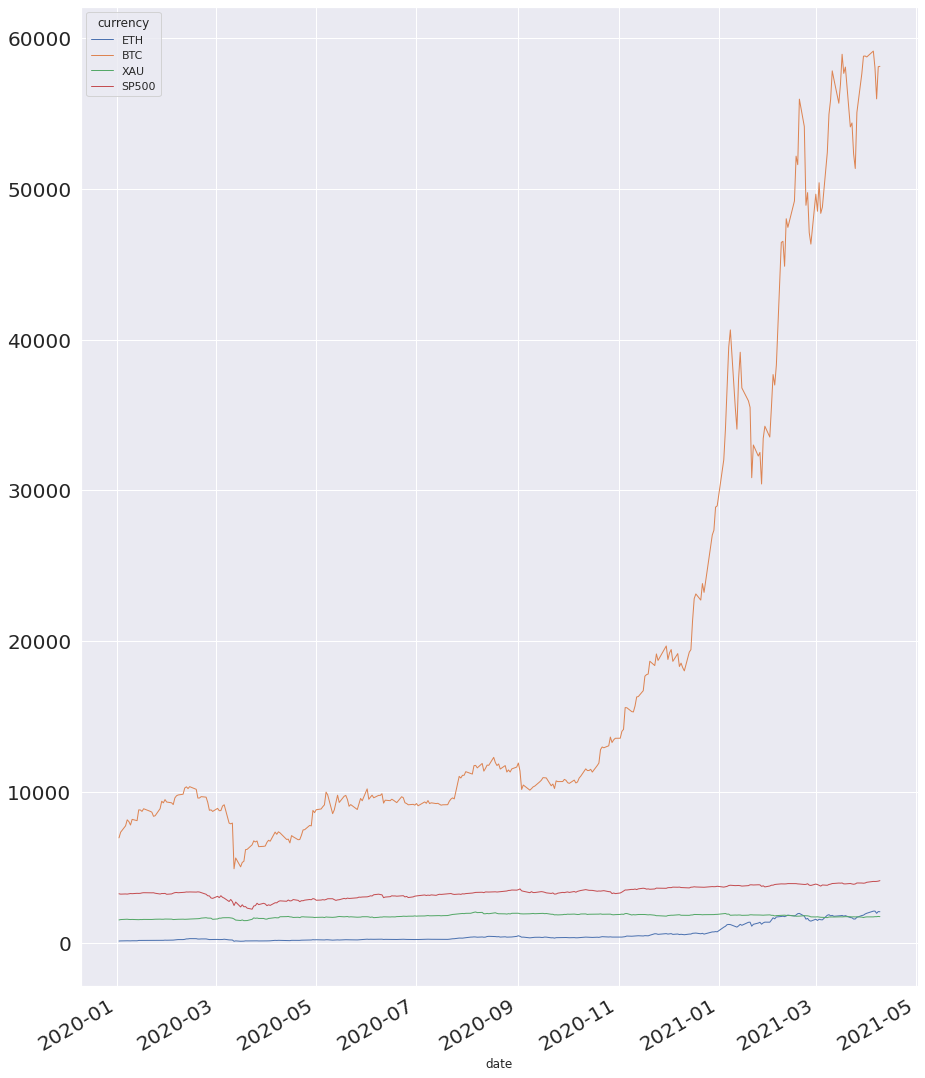

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.986541,0.159521,0.806469
BTC,0.986541,1.000000,0.106279,0.797790
XAU,0.159521,0.106279,1.000000,0.414633
SP500,0.806469,0.797790,0.414633,1.000000


In [8]:
#hide ### Koreliacijos matrica.

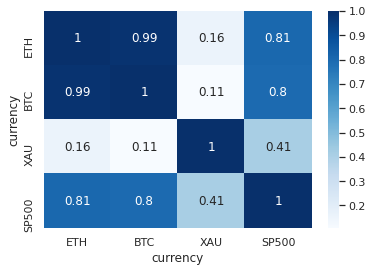

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')